In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
plt.rcParams['figure.dpi']=100

数据处理

In [89]:
iris = load_iris()
x, y = iris.data, iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

朴素贝叶斯

In [90]:
gnb = MultinomialNB(alpha=1)
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.57


SVM

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# 网格搜索
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(x_train, y_train)

# 评估模型
svm_acc = grid.score(x_test, y_test)
print(f"SVM准确率: {svm_acc:.4f}")


SVM准确率: 1.0000


knn

In [92]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn_acc=knn.score(x_test,y_test)
print(f"knn准确率: {knn_acc:.4f}")

knn准确率: 0.9667


投票集成

In [93]:


# 创建投票集成模型
voting_clf = VotingClassifier(
    estimators=[
        ('svm_clf' , SVC(kernel='linear', C=1.0, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('lig_reg2', LogisticRegression(penalty='l2', max_iter=1000))
    ],
    voting='hard'  # 硬投票
)
voting_clf.fit(x_train, y_train)
voting_acc = voting_clf.score(x_test, y_test)
print(f"投票集成准确率: {voting_acc:.4f}")

投票集成准确率: 1.0000


在这段代码中，我们创建了一个投票分类器 (`VotingClassifier`) 来集成多个基础分类器的预测结果。以下是代码的详细解释：

1. **`VotingClassifier`**:
   - `VotingClassifier` 是 Scikit-learn 提供的一种集成学习方法，用于结合多个分类器的预测结果以提高整体模型的性能。
   - 它支持两种投票方式：硬投票 (`hard voting`) 和软投票 (`soft voting`)。
     - 硬投票：根据每个分类器的预测结果进行多数表决，选择票数最多的类别。
     - 软投票：根据每个分类器的预测概率进行加权平均，选择概率最高的类别。

2. **`estimators` 参数**:
   - 这是一个包含多个基础分类器的列表，每个分类器由一个名称和一个模型实例组成。
   - 在这里，我们定义了三个基础分类器：
     - `'lin_reg'`: 一个逻辑回归分类器 (`LogisticRegression`)，最大迭代次数设置为 1000。
     - `'knn'`: 一个 K 最近邻分类器 (`KNeighborsClassifier`)，邻居数设置为 5。
     - `'log_reg'`: 另一个逻辑回归分类器，使用 L2 正则化，最大迭代次数设置为 1000。

3. **`voting` 参数**:
   - 这里设置为 `'hard'`，表示使用硬投票方式。每个基础分类器对样本进行预测后，最终的预测结果由多数表决决定。

通过这种方式，投票分类器可以结合多个模型的优势，从而提高分类的准确性和鲁棒性。

随机森林

In [94]:

param_grid = {
    'n_estimators': [50, 100, 150], # 决策树数量
    'max_depth': [5, 10, None],     # 最大深度
    'min_samples_split': [2, 5],    # 节点分裂所需最小样本数
    'criterion': ['gini'],          # 基尼指数，必须为列表
    'min_samples_leaf': [1, 2, 3],  # 叶节点最小样本数
}
rf = RandomForestClassifier(bootstrap=True) # 抽样放回
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.fit(x_train, y_train)  # 随机森林不需要特征缩放

# 评估
rf_acc = grid_search.score(X_test, y_test)
print(f"随机森林准确率: {rf_acc:.4f}")

随机森林准确率: 0.3667


在这段代码中，我们创建了一个随机森林分类器 (`RandomForestClassifier`) 来进行分类任务。以下是代码的详细解释：

1. **`RandomForestClassifier`**:
   - 随机森林是一种集成学习方法，通过构建多个决策树并结合它们的预测结果来提高模型的准确性和鲁棒性。
   - 它通过引入随机性（如随机选择特征和样本）来减少过拟合问题。

2. **参数说明**:
   - `n_estimators=100`:
     - 指定随机森林中包含的决策树数量。在这里，我们设置为 100 棵树。
     - 更多的树通常可以提高模型的性能，但也会增加计算成本。
   - `max_depth=None`:
     - 指定每棵决策树的最大深度。`None` 表示树会一直生长，直到所有叶子节点是纯的，或者叶子节点包含的样本数小于 `min_samples_split`。
     - 限制树的深度可以防止过拟合。
   - `random_state=42`:
     - 设置随机种子，以确保结果的可重复性。

3. **随机森林的特点**:
   - 随机森林通过对数据集进行多次采样（袋外采样，Bootstrap Sampling）来训练每棵树。
   - 每棵树在训练时只使用部分特征，从而增加了模型的多样性。
   - 最终的预测结果是通过所有树的投票（分类任务）或平均值（回归任务）得出的。

通过这种方式，随机森林能够在保持高准确率的同时，减少单一决策树可能出现的过拟合问题，是一种强大的集成学习方法。

Adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)  # 使用深度为 1 的决策树作为弱学习器
adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)#学习率0.1

# 训练模型
adaboost_clf.fit(X_train, y_train)

# 预测
y_pred = adaboost_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost 模型在测试集上的准确率: {accuracy:.2f}")

AdaBoost 模型在测试集上的准确率: 0.97


在这段代码中，我们创建了一个 AdaBoost 分类器 (`AdaBoostClassifier`) 来进行分类任务。以下是代码的详细解释：

1. **`AdaBoostClassifier`**:
   - AdaBoost（Adaptive Boosting）是一种提升方法，通过组合多个弱学习器（通常是决策树）来构建一个强大的分类器。
   - 它通过迭代地调整样本权重，使模型更加关注之前分类错误的样本，从而提高整体性能。

2. **参数说明**:
   - `n_estimators=50`:
     - 指定弱学习器的最大数量。在这里，我们设置为 50 个弱学习器。
     - 更多的弱学习器可能会提高模型的性能，但也可能导致过拟合。
   - `learning_rate=1.0`:
     - 学习率控制每个弱学习器对最终模型的贡献。较小的学习率可以提高模型的鲁棒性，但需要更多的弱学习器。
   - `random_state=42`:
     - 设置随机种子，以确保结果的可重复性。

3. **AdaBoost 的特点**:
   - 每次迭代中，AdaBoost 会根据前一轮的分类结果调整样本的权重，增加分类错误样本的权重。
   - 最终的分类结果是通过加权投票（分类任务）或加权平均（回归任务）得出的。

通过这种方式，AdaBoost 能够有效地提升弱学习器的性能，适用于处理噪声较少的数据集。

      Model  Accuracy
0     支持向量机  1.000000
3      投票集成  1.000000
1       KNN  0.966667
5  AdaBoost  0.966667
2     朴素贝叶斯  0.566667
4      随机森林  0.366667


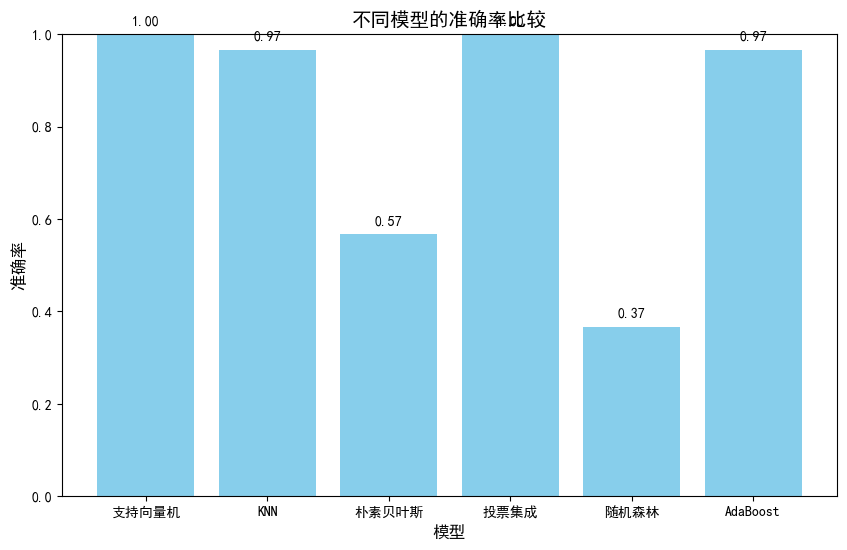

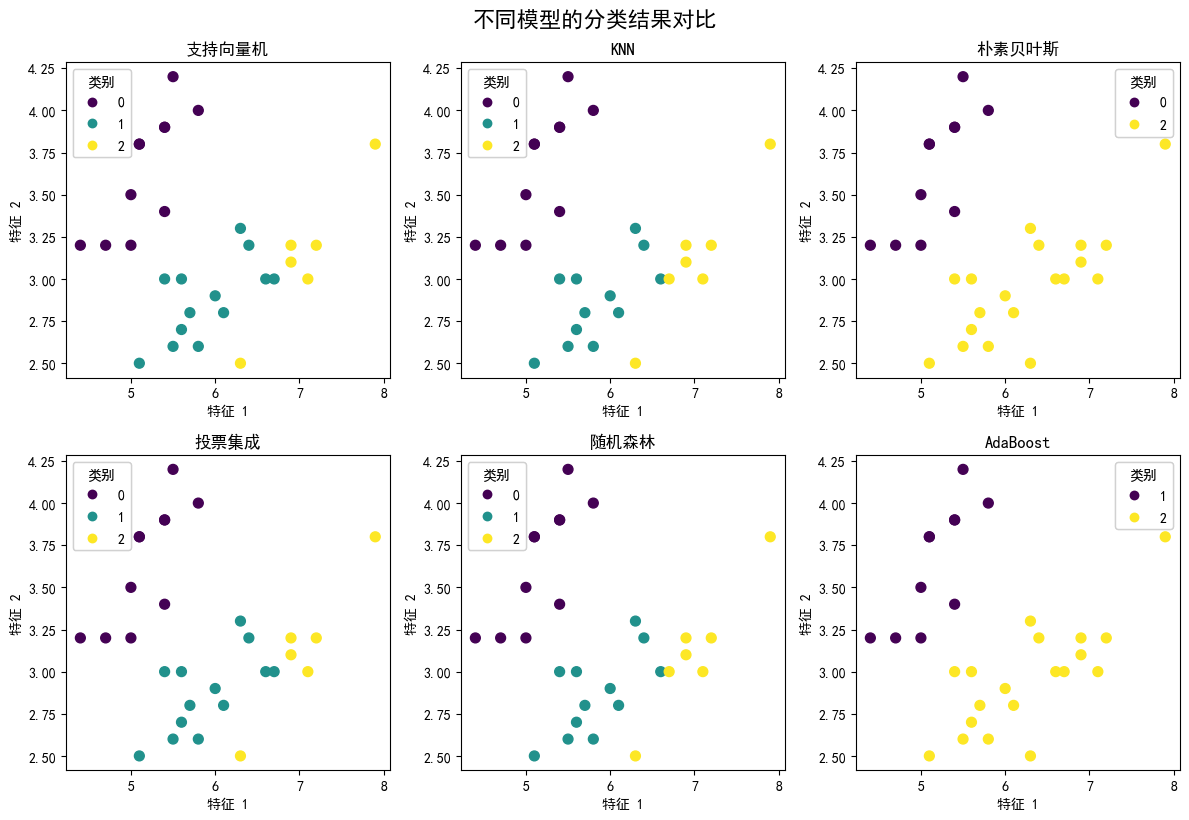

In [96]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['支持向量机', 'KNN', '朴素贝叶斯', '投票集成', '随机森林', 'AdaBoost'],
    'Accuracy': [svm_acc, knn_acc, accuracy_score(y_test, gnb.predict(x_test)), voting_acc, rf_acc, accuracy]
})

print(results.sort_values(by='Accuracy', ascending=False))

# 可视化模型准确率
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy'], color='skyblue')
plt.xlabel('模型', fontsize=12)
plt.ylabel('准确率', fontsize=12)
plt.title('不同模型的准确率比较', fontsize=14)
plt.ylim(0, 1)
for i, acc in enumerate(results['Accuracy']):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()

# 定义模型名称和预测结果
models = ['支持向量机', 'KNN', '朴素贝叶斯', '投票集成', '随机森林', 'AdaBoost']
predictions = [grid.predict(x_test), knn.predict(x_test), gnb.predict(x_test), 
               voting_clf.predict(x_test), grid_search.predict(x_test), adaboost_clf.predict(x_test)]

# 绘制对比图
plt.figure(figsize=(12, 8))
for i, (model, pred) in enumerate(zip(models, predictions)):
    plt.subplot(2, 3, i + 1)
    scatter = plt.scatter(x_test[:, 0], x_test[:, 1], c=pred, cmap='viridis', s=50)
    plt.title(model)
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    # 添加图例
    legend1 = plt.legend(*scatter.legend_elements(), title="类别")
    plt.gca().add_artist(legend1)
plt.tight_layout()
plt.suptitle('不同模型的分类结果对比', fontsize=16, y=1.02)
plt.show()